### Arewa Data Science Academy
### Deep Learning Cohort1.0
### Name: Ganiu Kuku
### Email: Ganiukuku@gmail.com
### Title: Week 4 Solution

In [2]:
# Check for GPU
!nvidia-smi

Wed Feb 26 23:46:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

2.5.1+cu124
Using device: cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

# **Healthcare**

- Medical Imaging: Computer vision is widely used for analyzing medical images such as X-rays, MRIs, and CT scans to detect diseases like cancer, fractures, or abnormalities.

- Diagnostics: Automated systems use computer vision to detect conditions like diabetic retinopathy, skin cancer, and more from images.

# **Retail** **and** **E**-**commerce**

- Automated Checkout: Computer vision powers cashier-less stores (e.g., Amazon Go) by tracking items customers pick up and automatically charging them.

- Inventory Management: Computer vision helps track stock levels, detect misplaced items, and monitor shelf conditions in real-time.

# **Autonomous** **Vehicles**

- Object Detection: Computer vision is critical for detecting pedestrians, vehicles, traffic signs, and obstacles in self-driving cars.

- Lane Detection: It helps autonomous vehicles stay within lanes by analyzing road markings.

- Navigation: Computer vision systems process real-time video feeds to make driving decisions and ensure safety.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

**Overfitting in machine learning happens when a model learns the training data too well, including its noise and irrelevant details, which makes it perform poorly on new, unseen data because it fails to generalize.**

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

# 1. Cross-Validation

What it is: Splitting the data into multiple subsets and training the model on different combinations of these subsets to ensure it generalizes well.

Why it helps: It provides a more robust evaluation of the model's performance on unseen data, reducing the risk of overfitting.

# 2. Regularization

What it is: Adding a penalty term to the model's loss function to discourage overly complex models (e.g., L1 or L2 regularization).

Why it helps: It prevents the model from fitting the noise in the training data by limiting the magnitude of the model's parameters.

# 3. Early Stopping

What it is: Monitoring the model's performance on a validation set during training and stopping the training process when performance starts to degrade.

Why it helps: It prevents the model from learning too much from the training data, which can lead to overfitting.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

The image was splitted into color layers
Red
Green
Blue

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define a transform to convert images to tensors and normalize them
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std of MNIST
])

# Load the MNIST training dataset
train_dataset = datasets.MNIST(
    root='./data',          # Directory to save the dataset
    train=True,             # Load the training set
    download=True,          # Download if not already available
    transform=transform     # Apply the defined transform
)

# Load the MNIST test dataset
test_dataset = datasets.MNIST(
    root='./data',          # Directory to save the dataset
    train=False,            # Load the test set
    download=True,          # Download if not already available
    transform=transform     # Apply the defined transform
)

# Print the sizes of the datasets
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 473kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.4MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training dataset size: 60000
Test dataset size: 10000


## 6. Visualize at least 5 different samples of the MNIST training dataset.

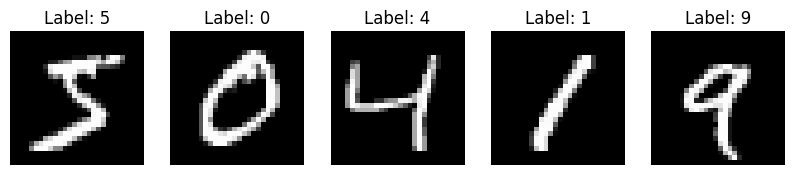

In [5]:
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define a transform to convert images to tensors
transform = transforms.Compose([
    transforms.ToTensor()  # Convert images to PyTorch tensors
])

# Load the MNIST training dataset
train_dataset = datasets.MNIST(
    root='./data',          # Directory to save the dataset
    train=True,             # Load the training set
    download=True,          # Download if not already available
    transform=transform     # Apply the defined transform
)

# Function to plot images
def plot_images(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i in range(num_samples):
        image, label = dataset[i]  # Get the image and label
        axes[i].imshow(image.squeeze(), cmap='gray')  # Remove the channel dimension and plot
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')  # Hide axes
    plt.show()

# Visualize 5 samples from the training dataset
plot_images(train_dataset, num_samples=5)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define a transform to convert images to tensors and normalize them
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std of MNIST
])

# Load the MNIST training dataset
train_dataset = datasets.MNIST(
    root='./data',          # Directory to save the dataset
    train=True,             # Load the training set
    download=True,          # Download if not already available
    transform=transform     # Apply the defined transform
)

# Load the MNIST test dataset
test_dataset = datasets.MNIST(
    root='./data',          # Directory to save the dataset
    train=False,            # Load the test set
    download=True,          # Download if not already available
    transform=transform     # Apply the defined transform
)

# Create DataLoaders for the train and test datasets
batch_size = 32
train_loader = DataLoader(
    dataset=train_dataset,  # Training dataset
    batch_size=batch_size,  # Batch size
    shuffle=True            # Shuffle the data for training
)

test_loader = DataLoader(
    dataset=test_dataset,   # Test dataset
    batch_size=batch_size,  # Batch size
    shuffle=False           # No need to shuffle for testing
)

# Print the number of batches in each DataLoader
print(f"Number of batches in train_loader: {len(train_loader)}")
print(f"Number of batches in test_loader: {len(test_loader)}")

Number of batches in train_loader: 1875
Number of batches in test_loader: 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
import torch
from torch import nn

class TinyVGG(nn.Module):
    """
    A CNN model based on the TinyVGG architecture from the CNN Explainer website.
    Adapted for the MNIST dataset (1 input channel, 28x28 images).
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,  # 1 channel for MNIST
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),  # Padding to maintain input size
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # Reduces spatial dimensions by half
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),  # Flatten the output for the fully connected layer
            nn.Linear(in_features=hidden_units*7*7,  # Adjusted for MNIST input size
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

# Define the model
model = TinyVGG(input_shape=1,  # MNIST has 1 input channel (grayscale)
                hidden_units=10,  # Number of filters in convolutional layers
                output_shape=10)  # MNIST has 10 classes (digits 0-9)

# Print the model architecture
print(model)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import time

# Define the TinyVGG model
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the model, loss function, and optimizer
model = TinyVGG(input_shape=1, hidden_units=10, output_shape=10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model
def train_model(device, epochs=5):
    # Move model to the specified device
    model.to(device)
    print(f"Training on {device}...")

    # Training loop
    start_time = time.time()
    for epoch in range(epochs):
        model.train()
        train_loss, train_acc = 0, 0
        for batch, (X, y) in enumerate(train_loader):
            # Move data to the same device as the model
            X, y = X.to(device), y.to(device)

            # Forward pass
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            train_loss += loss.item()

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            y_pred_class = torch.argmax(y_pred, dim=1)
            train_acc += (y_pred_class == y).sum().item() / len(y_pred)

        # Print metrics
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

    end_time = time.time()
    total_time = end_time - start_time
    print(f"Training completed on {device} in {total_time:.2f} seconds.")
    return total_time

# Train on CPU
cpu_time = train_model(device="cpu")

# Train on GPU (if available)
if torch.cuda.is_available():
    gpu_time = train_model(device="cuda")
else:
    print("GPU not available, skipping GPU training.")

# Compare training times
if torch.cuda.is_available():
    print(f"Training time on CPU: {cpu_time:.2f} seconds")
    print(f"Training time on GPU: {gpu_time:.2f} seconds")
    print(f"GPU was {cpu_time / gpu_time:.2f}x faster than CPU!")
else:
    print(f"Training time on CPU: {cpu_time:.2f} seconds")

Training on cpu...
Epoch 1/5, Loss: 0.1834, Accuracy: 0.9444
Epoch 2/5, Loss: 0.0671, Accuracy: 0.9796
Epoch 3/5, Loss: 0.0526, Accuracy: 0.9837
Epoch 4/5, Loss: 0.0448, Accuracy: 0.9858
Epoch 5/5, Loss: 0.0380, Accuracy: 0.9879
Training completed on cpu in 186.38 seconds.
Training on cuda...


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

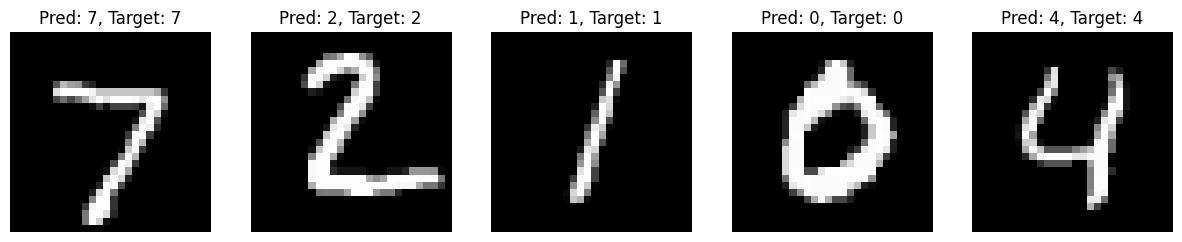

In [11]:
import matplotlib.pyplot as plt
import torch

# Ensure the model is in evaluation mode
model.eval()

# Function to make predictions and visualize results
def visualize_predictions(model, test_loader, device, num_samples=5):
    # Move model to the specified device
    model.to(device)

    # Get a batch of test data
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)

    # Make predictions
    with torch.no_grad():  # Disable gradient calculation for inference
        logits = model(images)
        preds = torch.argmax(logits, dim=1)  # Get predicted class labels

    # Move images and labels back to CPU for visualization
    images = images.cpu()
    labels = labels.cpu()
    preds = preds.cpu()

    # Plot the images with their predicted and target labels
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze(), cmap='gray')  # Remove channel dimension and plot
        axes[i].set_title(f"Pred: {preds[i]}, Target: {labels[i]}")
        axes[i].axis('off')
    plt.show()

# Call the function to visualize predictions
visualize_predictions(model, test_loader, device="cpu", num_samples=5)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

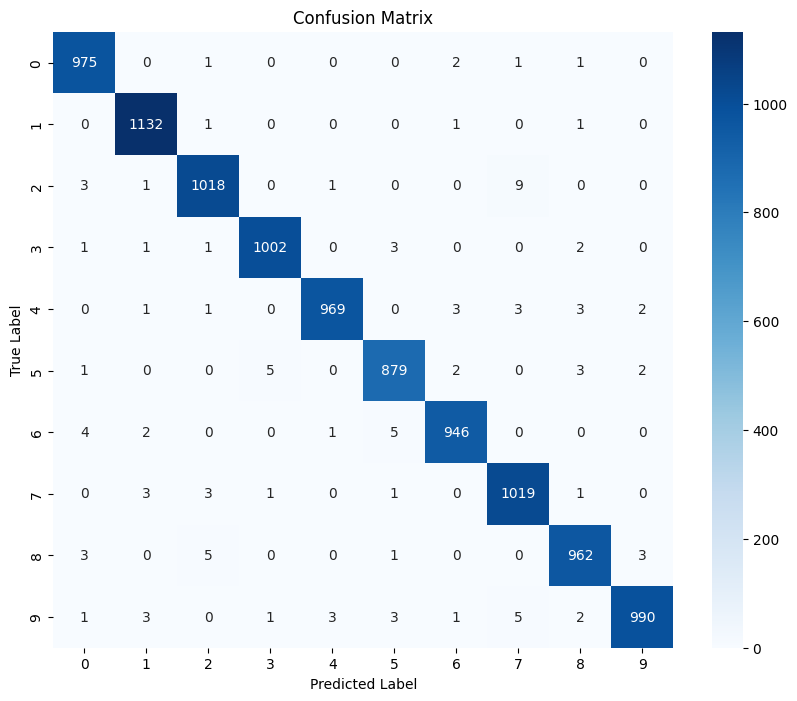

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch

# Ensure the model is in evaluation mode
model.eval()

# Lists to store predictions and true labels
all_preds = []
all_labels = []

# Make predictions on the test dataset
with torch.no_grad():  # Disable gradient calculation for inference
    for images, labels in test_loader:
        images, labels = images.to("cpu"), labels.to("cpu")  # Move data to CPU
        logits = model(images)  # Forward pass
        preds = torch.argmax(logits, dim=1)  # Get predicted class labels

        # Append predictions and labels to lists
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [13]:
import torch
import torch.nn as nn

# Create a random tensor of shape [1, 3, 64, 64]
random_tensor = torch.randn(1, 3, 64, 64)  # Batch size=1, Channels=3, Height=64, Width=64

# Function to pass the tensor through a Conv2d layer and print output shape
def test_conv2d(kernel_size):
    conv_layer = nn.Conv2d(
        in_channels=3,  # Input channels
        out_channels=16,  # Output channels
        kernel_size=kernel_size,  # Kernel size
        stride=1,  # Stride
        padding=0  # No padding
    )
    output = conv_layer(random_tensor)
    print(f"Kernel size: {kernel_size}, Output shape: {output.shape}")

# Test with different kernel sizes
kernel_sizes = [1, 3, 5, 7]
for ks in kernel_sizes:
    test_conv2d(ks)

Kernel size: 1, Output shape: torch.Size([1, 16, 64, 64])
Kernel size: 3, Output shape: torch.Size([1, 16, 62, 62])
Kernel size: 5, Output shape: torch.Size([1, 16, 60, 60])
Kernel size: 7, Output shape: torch.Size([1, 16, 58, 58])


# Goes down

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.5MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 197kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.67MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.2MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



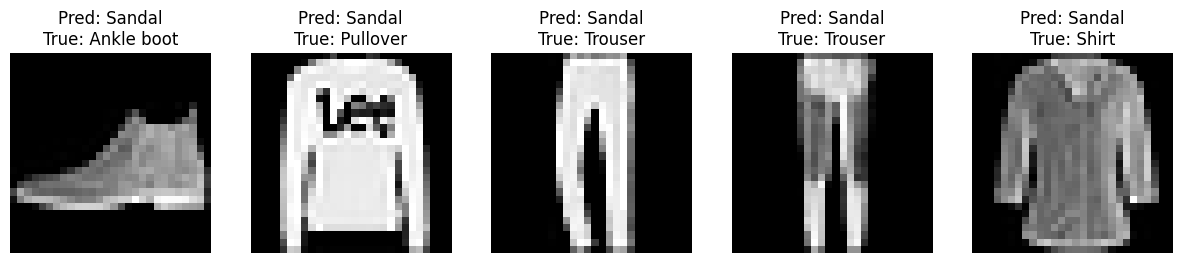

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the TinyVGG model (same as model_2 from notebook 03)
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

# Load FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Define the model (same architecture as model_2)
model = TinyVGG(input_shape=1, hidden_units=10, output_shape=10)  # 10 classes in FashionMNIST

# Load the trained model weights (if available)
# model.load_state_dict(torch.load("model_2.pth"))

# Move model to CPU (or GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Make predictions on the test dataset
model.eval()
incorrect_samples = []  # Store incorrect predictions

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        logits = model(images)
        preds = torch.argmax(logits, dim=1)

        # Find incorrect predictions
        incorrect_mask = preds != labels
        incorrect_images = images[incorrect_mask]
        incorrect_preds = preds[incorrect_mask]
        incorrect_labels = labels[incorrect_mask]

        # Store incorrect samples
        for img, pred, label in zip(incorrect_images, incorrect_preds, incorrect_labels):
            incorrect_samples.append((img.cpu(), pred.item(), label.item()))

        # Stop if we have enough incorrect samples
        if len(incorrect_samples) >= 10:
            break

# Define FashionMNIST class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot some incorrect predictions
plt.figure(figsize=(15, 6))
for i, (img, pred, label) in enumerate(incorrect_samples[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[label]}")
    plt.axis("off")
plt.show()

# it may be a modeling error, and the model could benefit from further tuning or a more complex architecture.